In [1]:
print("bismillahhirahmanirrahim")

bismillahhirahmanirrahim


# Training ANN Classifier Sinus-Cosinus Graph

## Import Library & CSV

In [2]:
import tensorflow as tf
import numpy as np                  # Math library
import matplotlib.pyplot as plt     # graphing library
import pandas as pd
import math                         # In-python math library

**EXPLANATION OF CELL ABOVE**<br>
menggunakan library (...) untuk (...)

In [3]:
# import file csv
file_path = 'dataSinCos.csv'

df = pd.read_csv(file_path)
df.head()  # Print the first few rows of the DataFrame

,x,y,label
0,4.796126,-0.578842,0
1,0.343251,0.186987,0
2,3.421123,-0.297790,0
3,4.661051,-1.145423,0
4,5.813519,-0.694686,0


**EXPLANATION OF CELL ABOVE**<br>
mengambil data csv

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   label   2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [5]:
# prompt: convert float64 to float32

# Assuming 'df' is your DataFrame and you want to convert a specific column
# Replace 'column_name' with the actual name of the column you want to convert
df['x'] = df['x'].astype(np.float32)
df['y'] = df['y'].astype(np.float32)
# Verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float32
 1   y       2000 non-null   float32
 2   label   2000 non-null   int64  
dtypes: float32(2), int64(1)
memory usage: 31.4 KB


In [6]:
df.head()

,x,y,label
0,4.796126,-0.578842,0
1,0.343251,0.186987,0
2,3.421123,-0.297790,0
3,4.661051,-1.145424,0
4,5.813519,-0.694686,0


**EXPLANATION OF CELL ABOVE**<br>
memeriksa data

## Plot DATA

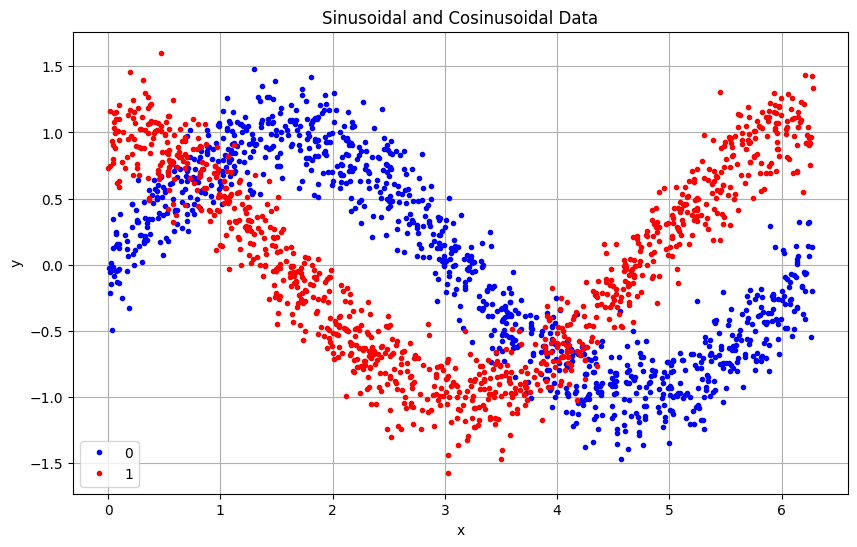

In [7]:
# prompt: make a new plot chart based on label, label 'sin' colored as blue and label 'cos' as red

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plot 'sin' data points in blue
plt.plot(df[df['label'] == 0]['x'],
         df[df['label'] == 0]['y'],
         'b.', label=0)

# Plot 'cos' data points in red
plt.plot(df[df['label'] == 1]['x'],
         df[df['label'] == 1]['y'],
         'r.', label=1)

plt.xlabel('x')  # Add x-axis label
plt.ylabel('y')  # Add y-axis label
plt.title('Sinusoidal and Cosinusoidal Data') # Add title
plt.legend() #Show Legend
plt.grid(True) # Add grid for better readability
plt.show()

**EXPLANATION OF CELL ABOVE**<br>
memeriksa data dengan grafik

## Build ANN Model

In [8]:
# prompt: initiate ML program of ANN

# BUAT MODEL
# Define the model of ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),  # Input layer with 2 features (x, y)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 2 units for binary classification
])



c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**EXPLANATION OF CELL ABOVE**<br>
- keras.sequential<br>
initiate stacking layers.  simple feedforward networks where the flow of data is straightforward.
- layers.Dense = layers is the place where neural nodes transform, calculate, compute the input data. each nodes connect to the next layers.<br>
Dense means a fully connected layers of nodes
- activation = activate function which allow nodes to learn the pattern of data
- relu = Rectified Linear Unit (ReLU), a function of non-linearity.
- softmax = activation function outputs probabilities that sum to 1. The output represents the model's confidence in each class.

In [9]:
# COMPILE MODEL
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**EXPLANATION OF CELL ABOVE**<br>
- optimizer :  adjust the model's weights to minimize the loss function during training.
- adam : Adaptive Moment Estimation
- loss : the difference between the model's predictions and the true labels.
- metrics : the percentage of predictions that match the true labels.

## Prepare Data Training & Testing

In [10]:
# Prepare the data
X = df[['x', 'y']].values  # Features (x, y) AS INDEPENDENT VARIABLE
y = df['label'].values     # Labels AS DEPENDENT VARIBLE


In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test)) # Adjust the number of epochs and batch size if needed


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5801 - loss: 0.6784 - val_accuracy: 0.6000 - val_loss: 0.6457
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.6180 - val_accuracy: 0.6800 - val_loss: 0.5763
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7727 - loss: 0.5337 - val_accuracy: 0.7775 - val_loss: 0.4915
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.4746 - val_accuracy: 0.7600 - val_loss: 0.4573
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.4078 - val_accuracy: 0.8025 - val_loss: 0.3985
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8199 - loss: 0.3602 - val_accuracy: 0.7950 - val_loss: 0.3756
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8505 - loss: 0.3172 - val_accuracy: 0.8500 - val_loss: 0.3562
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8794 - loss: 0.2998 - val_accuracy: 0.8500 - 

## Cek Akurasi

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9345 - loss: 0.1447
Test Loss: 0.1372608244419098
Test Accuracy: 0.9350000023841858


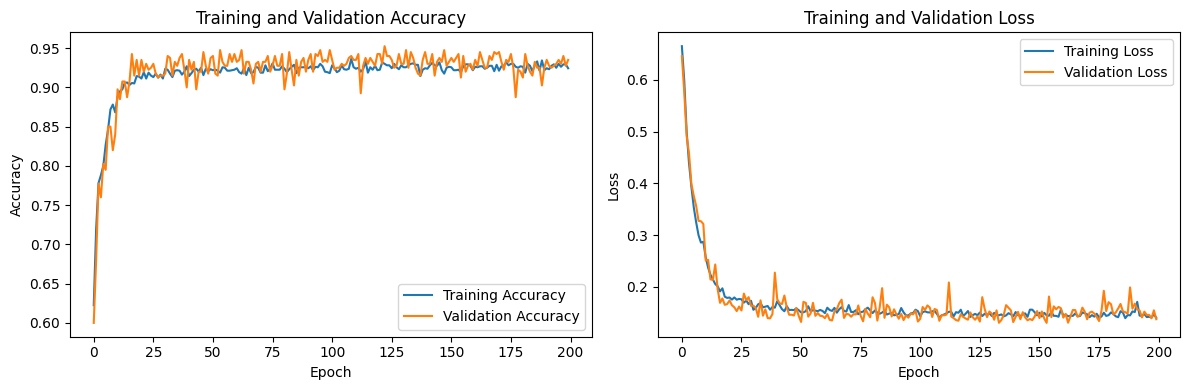

In [14]:
# Plot the accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


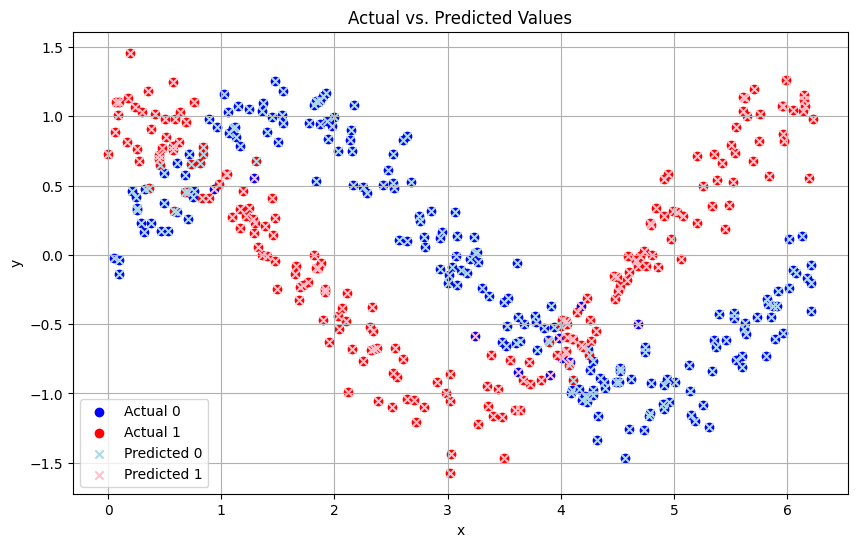

In [15]:
# prompt: display the training and predicted result on chart

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted classes

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', label='Actual 0', marker='o')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', label='Actual 1', marker='o')


# Plot the predicted data points
plt.scatter(X_test[y_pred_classes == 0, 0], X_test[y_pred_classes == 0, 1], c='lightblue', label='Predicted 0', marker='x')
plt.scatter(X_test[y_pred_classes == 1, 0], X_test[y_pred_classes == 1, 1], c='pink', label='Predicted 1', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

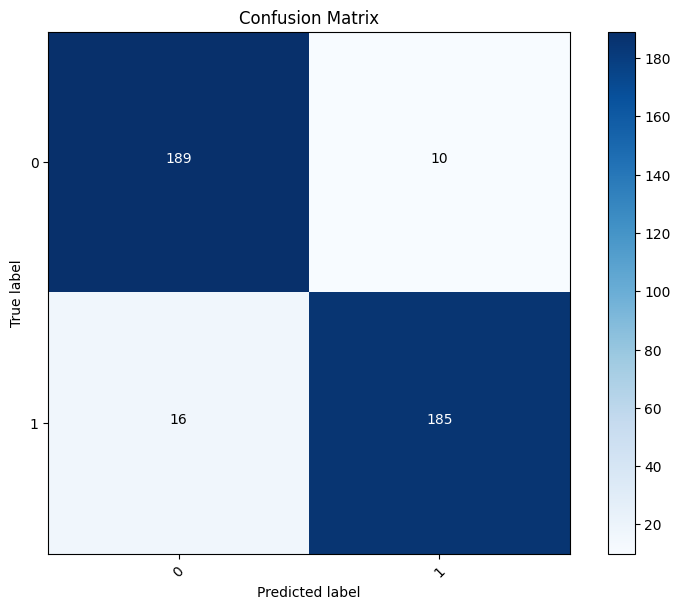

In [16]:
# prompt: display the result as confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_classes are defined from your previous code
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_test)  # Get unique class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
# prompt: display the predicted result

# Predict on new data
# Example new data points
new_data = np.array([[0.5, 0.8], [0.2, 0.1]])  # Example input features (x, y)

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predictions:")
print(predictions)

# Get predicted classes (0 or 1)
predicted_classes = np.argmax(predictions, axis=1)

# Print predicted classes
print("\nPredicted Classes:")
predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predictions:
[[5.9256420e-02 9.4074363e-01]
 [1.0000000e+00 2.2435588e-08]]

Predicted Classes:


array([1, 0], dtype=int64)

## Save ANN Model & Convert to TFLite

In [18]:
# Save the model as Keras model (reguler ML)
model.save('model.keras')

In [19]:
# Convert the model as .TFLite (TinyML)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpzlsk8sbj\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpzlsk8sbj\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmpzlsk8sbj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2842332820688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842386474832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441207056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441208016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441207248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441206096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441206672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441208400: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [20]:
# prompt: Convert the model to the TensorFlow Lite format with quantization as .TFLite (TinyML)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Save the quantized model.
with open('model_quantized.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpuw2zphfs\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpuw2zphfs\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmpuw2zphfs'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2842332820688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842386474832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441207056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441208016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441207248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441206096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441206672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2842441208400: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Cek akurasi file model (Keras & TFLite)

In [21]:
# Load the Keras model
keras_model = tf.keras.models.load_model('model.keras')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Evaluate the Keras model
keras_loss, keras_accuracy = keras_model.evaluate(X_test, y_test, verbose=0)
print(f"Keras Model - Loss: {keras_loss}, Accuracy: {keras_accuracy}")

# Evaluate the TFLite model
tflite_accuracy = 0
tflite_loss = 0
num_test_samples = len(X_test)
for i in range(num_test_samples):
    # Get the input tensor
    input_data = np.array([X_test[i]], dtype=np.float32)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    tflite_predictions = interpreter.get_tensor(output_details[0]['index'])
    tflite_predicted_class = np.argmax(tflite_predictions[0])
    
    # Calculate accuracy and loss for TFLite model (Simplified for demonstration)
    if tflite_predicted_class == y_test[i]:
      tflite_accuracy += 1
    # Assuming you have a way to compute loss directly from TFLite output
    # ... replace with your actual loss calculation if possible ...
    # Example: tflite_loss += some_loss_function(tflite_predictions[0], y_test[i])

tflite_accuracy /= num_test_samples
print(f"TFLite Model - Accuracy: {tflite_accuracy}") # Loss calculation omitted

Keras Model - Loss: 0.1372608244419098, Accuracy: 0.9350000023841858
TFLite Model - Accuracy: 0.935


In [22]:
# prompt: calculate and compare the size of keras model and tensorflow lite model

import os

# Get the file size of the Keras model
keras_model_size = os.path.getsize('model.keras')
print(f"Keras model size: {keras_model_size} bytes")

# Get the file size of the TensorFlow Lite model
tflite_model_size = os.path.getsize('model.tflite')
print(f"TFLite model size: {tflite_model_size} bytes")

# Get the file size of the quantized TensorFlow Lite model
tflite_quant_model_size = os.path.getsize('model_quantized.tflite')
print(f"Quantized TFLite model size: {tflite_quant_model_size} bytes")

# Compare the sizes
print("\nModel Size Comparison:")
print(f"Keras model is {keras_model_size / tflite_model_size:.2f} times larger than the TFLite model.")
print(f"Keras model is {keras_model_size / tflite_quant_model_size:.2f} times larger than the quantized TFLite model.")
print(f"TFLite model is {tflite_model_size / tflite_quant_model_size:.2f} times larger than the quantized TFLite model.")

Keras model size: 159696 bytes
TFLite model size: 45600 bytes
Quantized TFLite model size: 16080 bytes

Model Size Comparison:
Keras model is 3.50 times larger than the TFLite model.
Keras model is 9.93 times larger than the quantized TFLite model.
TFLite model is 2.84 times larger than the quantized TFLite model.
